How much more efficient is 'CEA' vs. current commercial techniques for cherry-tomato production?  

In [66]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## LOAD DATA

crop data from two teams in the CEAOD Autonomous GreenHouse Challenge 2019

*   Reference - Dutch Farmers employing current manual farming method 
*   Automatoes - CEA Farmers employing their automated farming method



In [67]:
#Resources used and Production metrics for 'Reference' team using  current commercial methods
dfR_resrc = pd.read_csv('/content/drive/MyDrive/Farming Indoors/Efficiency Analysis - raw data/Ref_Resources.csv')
dfR_harv = pd.read_csv('/content/drive/MyDrive/Farming Indoors/Efficiency Analysis - raw data/Ref_Production.csv')

#Resources used and Production metrics for 'Automatoes' using CEA
dfA_resrc = pd.read_csv('/content/drive/MyDrive/Farming Indoors/Efficiency Analysis - raw data/Auto_Resources.csv')
dfA_harv = pd.read_csv('/content/drive/MyDrive/Farming Indoors/Efficiency Analysis - raw data/Auto_Production.csv')

**EXPLORE** structure and type of data

In [68]:
dfR_resrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %Time      166 non-null    int64  
 1   Heat_cons  166 non-null    float64
 2   ElecHigh   166 non-null    float64
 3   ElecLow    166 non-null    float64
 4   CO2_cons   166 non-null    float64
 5   Irr        166 non-null    float64
 6   Drain      166 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 9.2 KB


In [69]:
dfR_resrc.describe()

,%Time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,43897.500000,2.840723,0.930723,0.678916,0.052012,4.750602,2.110241
std,48.064193,1.235581,0.633381,0.381355,0.023226,2.193233,1.441701
min,43815.000000,0.130000,0.000000,0.000000,0.009824,0.000000,0.000000
25%,43856.250000,1.902500,0.400000,0.600000,0.035974,3.500000,0.800000
50%,43897.500000,2.905000,1.400000,0.900000,0.046793,5.300000,2.200000
75%,43938.750000,3.652500,1.500000,0.900000,0.063736,6.375000,3.300000
max,43980.000000,5.960000,1.500000,1.000000,0.138482,8.300000,5.200000


# Resources

display the **'Reference'** resources used:

In [70]:
#calculate and display sum-values and engineered feature(s) values and store to list:  resources_ref

ref_resources = []

print('pick-hours electric:', dfR_resrc['ElecHigh'].sum(), 'KWh/m^2')
ref_resources.append(dfR_resrc['ElecHigh'].sum())

print('off pick-hours electric:', dfR_resrc['ElecLow'].sum(), 'KWh/m^2')
ref_resources.append(dfR_resrc['ElecLow'].sum())

print('CO2 consumption:', dfR_resrc['CO2_cons'].sum(), 'kg/m^2')
ref_resources.append(dfR_resrc['CO2_cons'].sum())

print('heat consumption:', dfR_resrc['Heat_cons'].sum(), 'MJ/m^2')
ref_resources.append(dfR_resrc['Heat_cons'].sum())

print('Water used:', (dfR_resrc['Irr'] - dfR_resrc['Drain']).sum(), 'L/m^2')
ref_resources.append((dfR_resrc['Irr'] - dfR_resrc['Drain']).sum())

print(ref_resources)

pick-hours electric: 154.5 KWh/m^2
off pick-hours electric: 112.70000000000002 KWh/m^2
CO2 consumption: 8.633909111000001 kg/m^2
heat consumption: 471.55999999999995 MJ/m^2
Water used: 438.29999999999995 L/m^2
[154.5, 112.70000000000002, 8.633909111000001, 471.55999999999995, 438.29999999999995]


display the **'Automatoes'** resources used:

In [71]:
#calculate and display sum-values and engineered feature(s) values and store to list:  resources_auto

auto_resources = []

print('pick-hours electric:', dfA_resrc['ElecHigh'].sum(), 'KWh/m^2')
auto_resources.append(dfA_resrc['ElecHigh'].sum())

print('off pick-hours electric:', dfA_resrc['ElecLow'].sum(), 'KWh/m^2')
auto_resources.append(dfA_resrc['ElecLow'].sum())

print('CO2 consumption:', dfA_resrc['CO2_cons'].sum(), 'kg/m^2')
auto_resources.append(dfA_resrc['CO2_cons'].sum())

print('heat consumption:', dfA_resrc['Heat_cons'].sum(), 'MJ/m^2')
auto_resources.append(dfA_resrc['Heat_cons'].sum())

print('Water used:', (dfA_resrc['Irr'] - dfA_resrc['Drain']).sum(), 'L/m^2')
auto_resources.append((dfA_resrc['Irr'] - dfA_resrc['Drain']).sum())

print(auto_resources)

pick-hours electric: 155.6 KWh/m^2
off pick-hours electric: 114.84758333599999 KWh/m^2
CO2 consumption: 9.069950006 kg/m^2
heat consumption: 185.3139 MJ/m^2
Water used: 464.7718181809999 L/m^2
[155.6, 114.84758333599999, 9.069950006, 185.3139, 464.7718181809999]


**VISUALIZE** side-by-side bar plot of the values from each list:  resources_ref vs. resouces_auto 

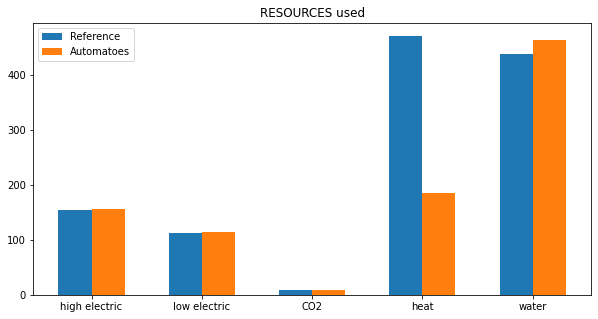

In [80]:
# Numbers of pairs of bars you want
N = 5

# Specify the values
ref_resources = (154.5, 112.70000000000002, 8.633909111000001, 471.55999999999995, 438.29999999999995)
# Specify the values
auto_resources = (155.6, 114.84758333599999, 9.069950006, 185.3139, 464.7718181809999)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, ref_resources , width, label='Reference')
plt.bar(ind + width, auto_resources, width, label='Automatoes')

plt.title('RESOURCES used')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('high electric', 'low electric', 'CO2', 'heat', 'water'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

# Production

display the **'Reference'** production-metrics:

In [ ]:
ref_production = []

print('number of class A fruit:', dfR_harv['Nr_fruits_ClassA'].sum())
ref_production.append(dfR_harv['Nr_fruits_ClassA'].sum())

print('number of class B fruit:',dfR_harv['Nr_fruits_ClassB'].sum())
ref_production.append(dfR_harv['Nr_fruits_ClassB'].sum())

print('average number of trusses:', dfR_harv['avg_nr_harvested_trusses'].sum())
ref_production.append(dfR_harv['avg_nr_harvested_trusses'].sum())

print('class A weight:', dfR_harv['Weight_fruits_ClassA'].sum(), 'Kg/m^2')
ref_production.append(dfR_harv['Weight_fruits_ClassA'].sum())

print('class B weight:', dfR_harv['Weight_fruits_ClassB'].sum(), 'Kg/m^2')
ref_production.append(dfR_harv['Weight_fruits_ClassB'].sum())

print(ref_production)

number of class A fruit: 2909.0
number of class B fruit: 0
average number of trusses: 22.200000000000003
class A weight: 28138.2 Kg/m^2
class B weight: 0 Kg/m^2
[2909.0, 0, 22.200000000000003, 28138.2, 0]


display the **'Automatoes'** production-metrics:

In [ ]:
auto_production = []

print('number of class A fruit:', dfA_harv['Nr_fruits_ClassA'].sum())
auto_production.append(dfA_harv['Nr_fruits_ClassA'].sum())

print('number of class B fruit:',dfA_harv['Nr_fruits_ClassB'].sum())
auto_production.append(dfA_harv['Nr_fruits_ClassB'].sum())

print('average number of trusses:', dfA_harv['avg_nr_harvested_trusses'].sum())
auto_production.append(dfA_harv['avg_nr_harvested_trusses'].sum())

print('class A weight:', dfA_harv['Weight_fruits_ClassA'].sum(), 'Kg/m^2')
auto_production.append(dfA_harv['Weight_fruits_ClassA'].sum())

print('class B weight:', dfA_harv['Weight_fruits_ClassB'].sum(), 'Kg/m^2')
auto_production.append(dfA_harv['Weight_fruits_ClassB'].sum())

print(auto_production)

number of class A fruit: 3026.0
number of class B fruit: 37
average number of trusses: 22.2
class A weight: 28479.2 Kg/m^2
class B weight: 354 Kg/m^2
[3026.0, 37, 22.2, 28479.2, 354]


**VISUALIZE** side-by-side bar plot of the values from each list:  production_ref vs. production_auto 

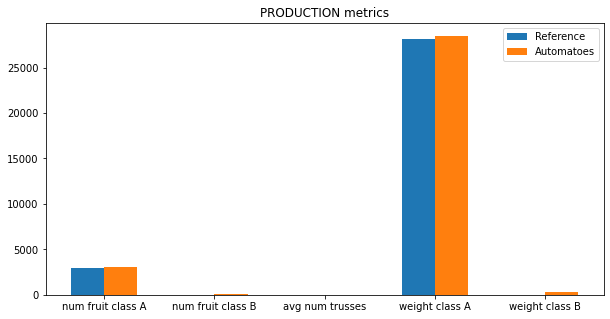

In [88]:
# Numbers of pairs of bars you want
N = 5

# Specify the values
ref_production = (2909.0, 0, 22.200000000000003, 28138.2, 0)
# Specify the values
auto_production = (3026.0, 37, 22.2, 28479.2, 354)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, ref_production , width, label='Reference')
plt.bar(ind + width, auto_production, width, label='Automatoes')

plt.title('PRODUCTION metrics')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('num fruit class A', 'num fruit class B', 'avg num trusses', 'weight class A', 'weight class B'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()